# Part 1 – Present an Overview of Hyper-Parameter Optimization: A Review of Algorithms and Applications (from the attached paper)


## 1. Introduction  
Hyperparameters are parameters **not updated during training** but set prior to model learning. Their proper selection has a profound impact on both training efficiency and final model performance. Manual hyperparameter tuning is costly, inconsistent, and often relies on human intuition. Automated Hyper-Parameter Optimization (HPO) methods aim to systematically and efficiently explore the search space, reducing human effort while improving reproducibility.  

## 2. Categories of Hyperparameters  
- **Training-related**: learning rate (LR), batch size, optimizer, momentum, regularization, learning rate decay.  
- **Model structure-related**: number of layers, number of neurons, activation functions, dropout rate.  

## 3. Why Optimize Hyperparameters?  
- Ensures better convergence and accuracy.  
- Reduces reliance on trial-and-error methods.  
- Improves reproducibility of ML experiments.  
- Saves computational resources with automated search strategies.  

## 4. Search Algorithms for HPO  
- **Grid Search**: Exhaustive search across parameter grid; simple but computationally expensive.  
- **Random Search**: Samples parameter combinations randomly; more efficient than grid for high-dimensional spaces.  
- **Bayesian Optimization (BO)**: Builds surrogate models (commonly Gaussian Processes) and acquisition functions to balance exploration vs. exploitation.  
- **Tree-structured Parzen Estimators (TPE)**: Extends BO for categorical and conditional search spaces.  
- **Bandit-based Methods**:  
  - Successive Halving (SHA), HyperBand (HB): allocate more resources to promising trials.  
  - ASHA: asynchronous parallelized version of SHA.  
  - BOHB: hybrid of Bayesian Optimization + HyperBand.  

## 5. Early Stopping & Trial Scheduling  
- Median stopping rule.  
- Curve fitting methods for predicting performance.  
- Freeze-Thaw Bayesian Optimization.  
- Bandit-based early stopping (SHA, HB, ASHA).  

## 6. Toolkits & Services for HPO  
- **Industry-grade**: Google Vizier, Amazon SageMaker.  
- **Open-source**: Microsoft NNI, Ray Tune, HyperOpt, Optuna, Keras Tuner.  
- Differ in scalability, integration ease, and algorithm support.  

## 7. Applications of HPO  
- **Computer Vision**: CNNs, ResNet, EfficientNet.  
- **Natural Language Processing**: Transformers, BERT.  
- **Industrial Systems**: real-time scheduling, predictive maintenance.  
- **Model Scaling**: large-scale deep networks and lightweight architectures (e.g., MobileNet, EfficientNet).  

## 8. Challenges & Future Directions  
- High computational costs in large search spaces.  
- Poor scalability of Bayesian methods for high dimensions.  
- Need for automated budget/resource scheduling.  
- Balancing exploration and exploitation in dynamic environments.  

📌 **Takeaway**: HPO is central to modern AI, shifting from manual trial-and-error to automated, efficient, and scalable optimization frameworks.  

---


# Part 2- Image Classification & Hyperparameter Turning on Fashion-MNIST.

The objective of this project is to predict fashion classes such as pants, shirts, and shoes from grayscale images. This guided project is practical and directly applicable to the fashion industry. You can add this project to your portfolio of projects which is essential for your next job interview.
Learning Objectives
________________________________________
•	Perform data cleaning, feature engineering and visualization
•	Understand the theory and intuition behind artificial neural networks
•	Build, train and test an artificial neural network model in Keras and Tensorflow
Overview of Health Care Systems and


__Objective:__ To classify images of different pieces of clothing.

__Client & Data-Set:__ Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

Data-set is publicly available on kaggle and __[Zalando Fashion MNIST repository](https://github.com/zalandoresearch/fashion-mnist)__ on Github.

Fashion-MNIST is intended as direct drop-in replacement for the original MNIST dataset. It shares the same image size and structure of training and testing splits.

__Business Impact:__ E-commerce companies have lots of items for sale online which requires lots of images to be displayed on their websites, applications and on social media. And it takes lot of human power and time to separate these images into respective groups. This classifier which we are going to build helps businesses to categorize images into respective groups.

__Labels:__ Each training and test example is assigned to one of the following labels:

•	0 - T-shirt/top
•	1 - Trouser
•	2 - Pullover
•	3 - Dress
•	4 - Coat
•	5 - Sandal
•	6 - Shirt
•	7 - Sneaker
•	8 - Bag
•	9 - Ankle boot

In [94]:
!pip install keras-tuner

In [95]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow import keras

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(
        filters=hp.Int('filters', 32, 128, step=32),
        kernel_size=hp.Choice('kernel_size', [3,5]),
        activation='relu',
        input_shape=(28,28,1)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(
        units=hp.Int('units', 64, 1024, step=64),
        activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

tuner = kt.BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    directory='fashion_tuning',
    project_name='cnn_fashion')


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# TASK #1: UNDERSTAND THE PROBLEM STATEMENT  

# Problem Definition  

We need to build an **image classification model** capable of recognizing different types of clothing/fashion items from grayscale images.  

The dataset used is **Fashion-MNIST** (Zalando Research).  

---

# Dataset Details  

- **Training set**: 60,000 images  
- **Test set**: 10,000 images  
- **Image size**: 28×28 pixels, grayscale (1 color channel)  
- **Number of classes (labels)**: 10 fashion categories  

| Label | Class         |
|-------|--------------|
| 0     | T-shirt/top  |
| 1     | Trouser      |
| 2     | Pullover     |
| 3     | Dress        |
| 4     | Coat         |
| 5     | Sandal       |
| 6     | Shirt        |
| 7     | Sneaker      |
| 8     | Bag          |
| 9     | Ankle boot   |

---

# Objective  

Train a **Deep Learning (CNN) model** that can accurately classify an input image into one of the 10 classes above.  

---

# Business Impact  

In the **e-commerce industry**, millions of fashion product images need to be classified and labeled every day.  

Instead of relying on manual classification, which is time-consuming and costly, this automated model can:  

- **Speed up data processing**  
- **Reduce labor costs**  
- **Improve accuracy and consistency** in product display across websites/apps  


In [96]:
import tensorflow as tf

# Load dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# In ra kích thước dữ liệu
print("Kích thước tập train (X_train):", X_train.shape)
print("Kích thước nhãn train (y_train):", y_train.shape)
print("Kích thước tập test (X_test):", X_test.shape)
print("Kích thước nhãn test (y_test):", y_test.shape)

# Kiểm tra số lớp nhãn duy nhất
print("Số lớp nhãn duy nhất:", len(set(y_train)))
print("Các nhãn:", set(y_train))


Kích thước tập train (X_train): (60000, 28, 28)
Kích thước nhãn train (y_train): (60000,)
Kích thước tập test (X_test): (10000, 28, 28)
Kích thước nhãn test (y_test): (10000,)
Số lớp nhãn duy nhất: 10
Các nhãn: {np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(7), np.uint8(8), np.uint8(9)}


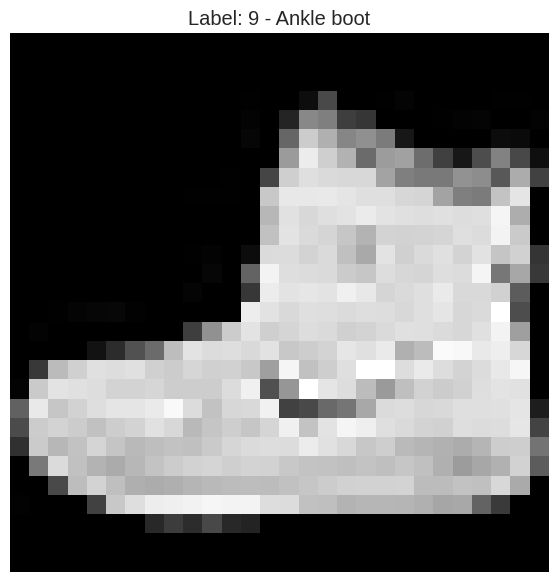

In [97]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Load dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Danh sách tên class để giải mã nhãn
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Hiển thị 1 ảnh bất kỳ trong tập train
index = 0  # bạn có thể đổi index = 10, 100,... để xem ảnh khác
plt.imshow(X_train[index], cmap='gray')
plt.title(f"Label: {y_train[index]} - {class_names[y_train[index]]}")
plt.axis("off")
plt.show()


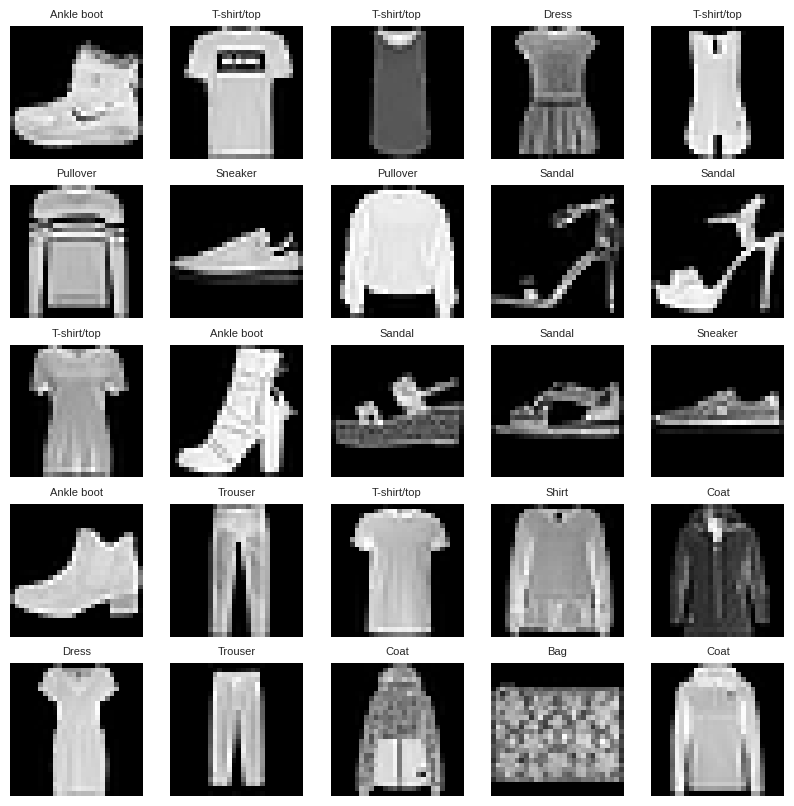

In [98]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Load dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Danh sách tên class
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Vẽ lưới ảnh 5x5
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]], fontsize=8)
plt.show()


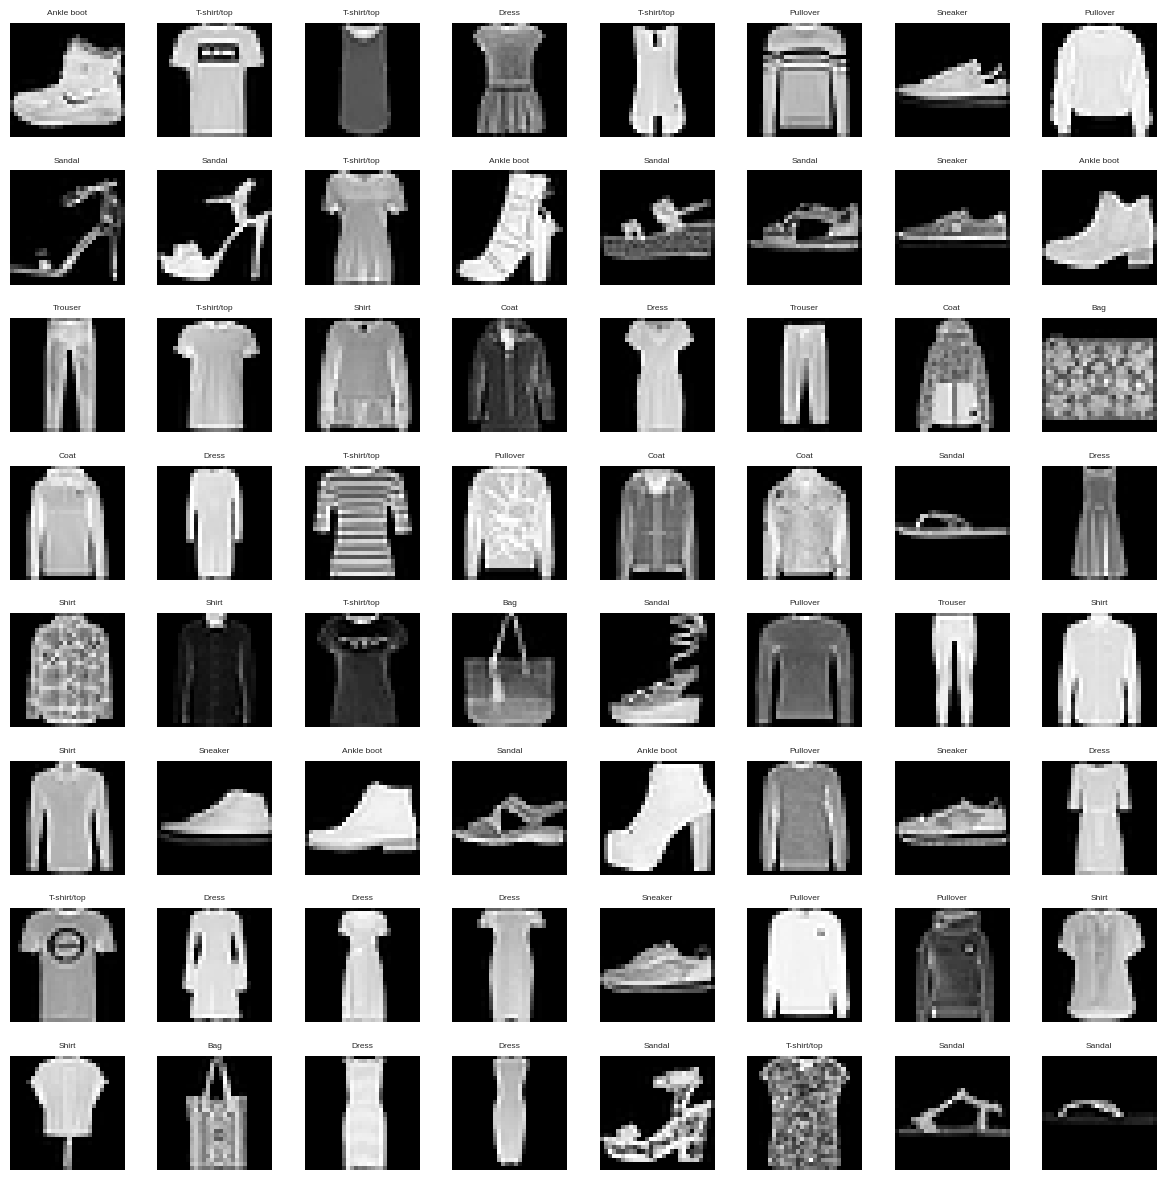

In [99]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Load dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Danh sách tên class
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Vẽ lưới 8x8 = 64 ảnh
plt.figure(figsize=(12,12))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]], fontsize=6)  # font nhỏ để vừa
plt.tight_layout()
plt.show()


![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [100]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
import keras
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical #tensorflow.
# from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam #tensorflow.
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, ZeroPadding2D
# from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [101]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist

In [102]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [103]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [104]:
# Bước 1: Chuẩn hóa dữ liệu về [0,1]
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# Bước 2: Reshape thêm channel (1 kênh vì ảnh grayscale)
train_images = np.expand_dims(train_images, -1)  # (60000, 28, 28, 1)
test_images = np.expand_dims(test_images, -1)    # (10000, 28, 28, 1)

# Bước 3: One-hot encode cho nhãn
num_classes = 10
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

# In ra kết quả để kiểm tra
print("train_images:", train_images.shape)
print("train_labels:", train_labels.shape)
print("test_images:", test_images.shape)
print("test_labels:", test_labels.shape)

train_images: (60000, 28, 28, 1)
train_labels: (60000, 10)
test_images: (10000, 28, 28, 1)
test_labels: (10000, 10)


In [105]:
!pip install jupyterthemes

In [106]:


import matplotlib.pyplot as plt
from jupyterthemes import jtplot
#jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)
# setting the style of the notebook to be monokai theme
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them.


In [107]:
# Use the same dataset made readily available by keras Using the following lines of code:
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)
plt.style.use('seaborn-v0_8-darkgrid')


**PRACTICE OPPORTUNITY #1:**
- **Check out the sizes of both training and testing datasets**

In [108]:
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10), (10000, 10))

# TASK #3: PERFORM DATA VISUALIZATION

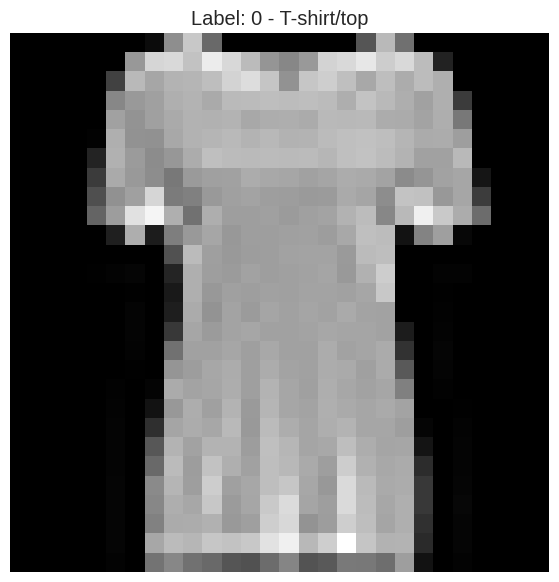

In [109]:
# Select a sample image and visualize it
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

index = 10

# Lấy label gốc từ one-hot
label_index = np.argmax(train_labels[index])

plt.imshow(train_images[index].reshape(28,28), cmap='gray')
plt.title(f"Label: {label_index} - {class_names[label_index]}")
plt.axis("off")
plt.show()

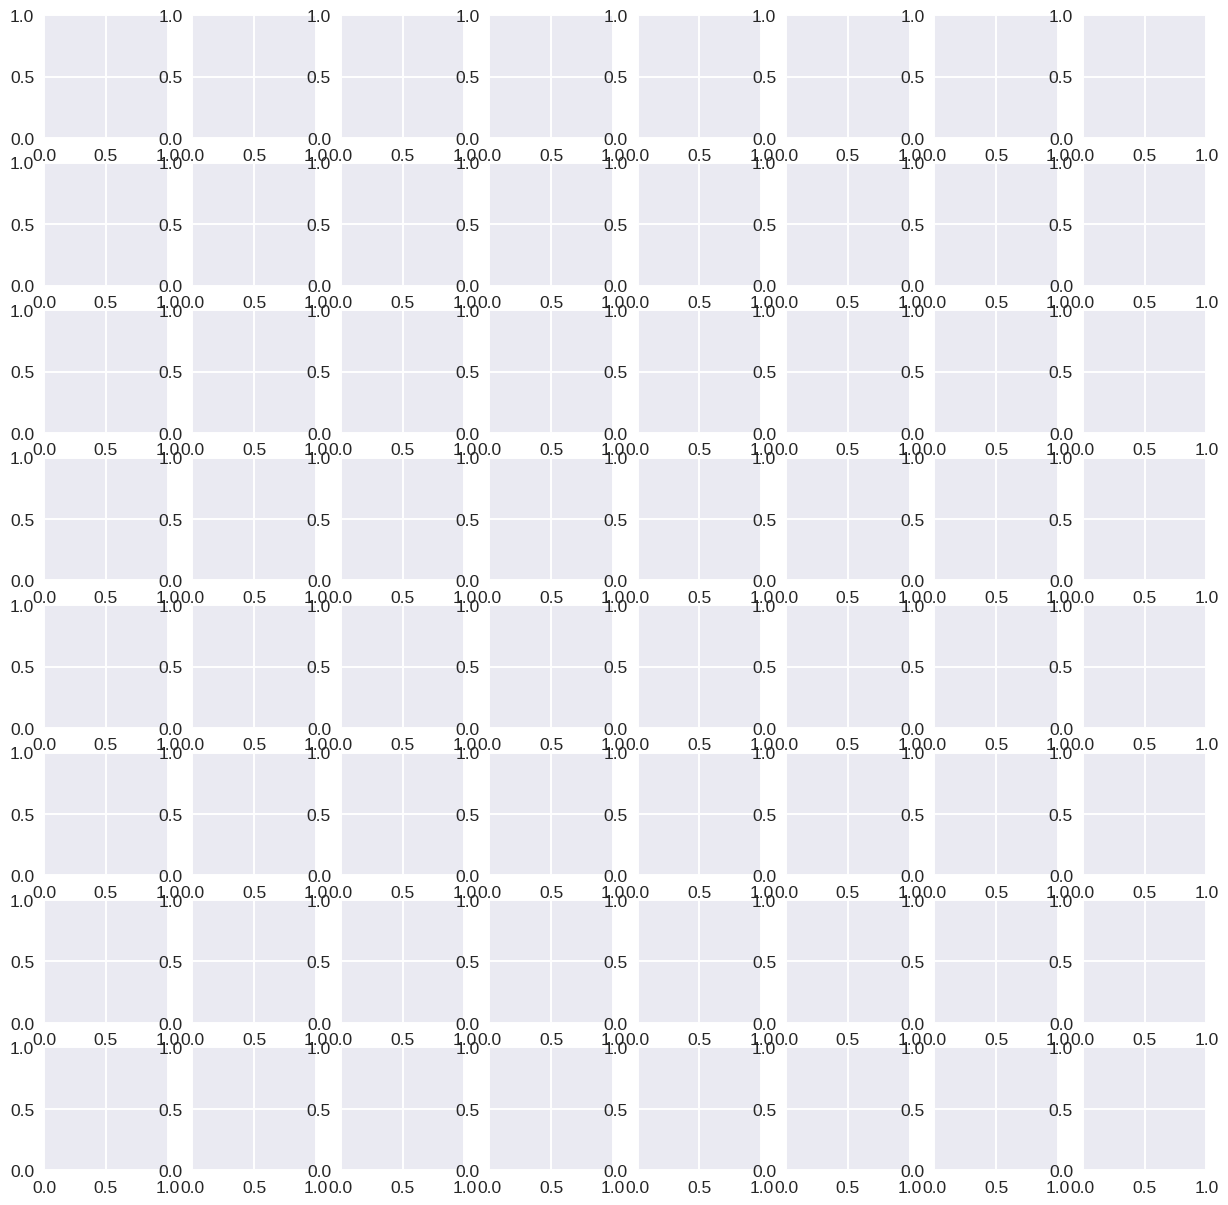

In [110]:
# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot


W_grid = 8
L_grid = 8

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15, 15))
axes = axes.ravel()





In [111]:
for i in range(0, W_grid * L_grid):
    label_index = np.argmax(train_labels[i])
    axes[i].imshow(train_images[i].reshape(28,28), cmap='gray')
    axes[i].set_title(class_names[label_index], fontsize=6)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.5)
plt.show()

<Figure size 800x700 with 0 Axes>

**PRACTICE OPPORTUNITY #2:**
- **Plot a grid containing 144 images and perform a sanity check on the data**

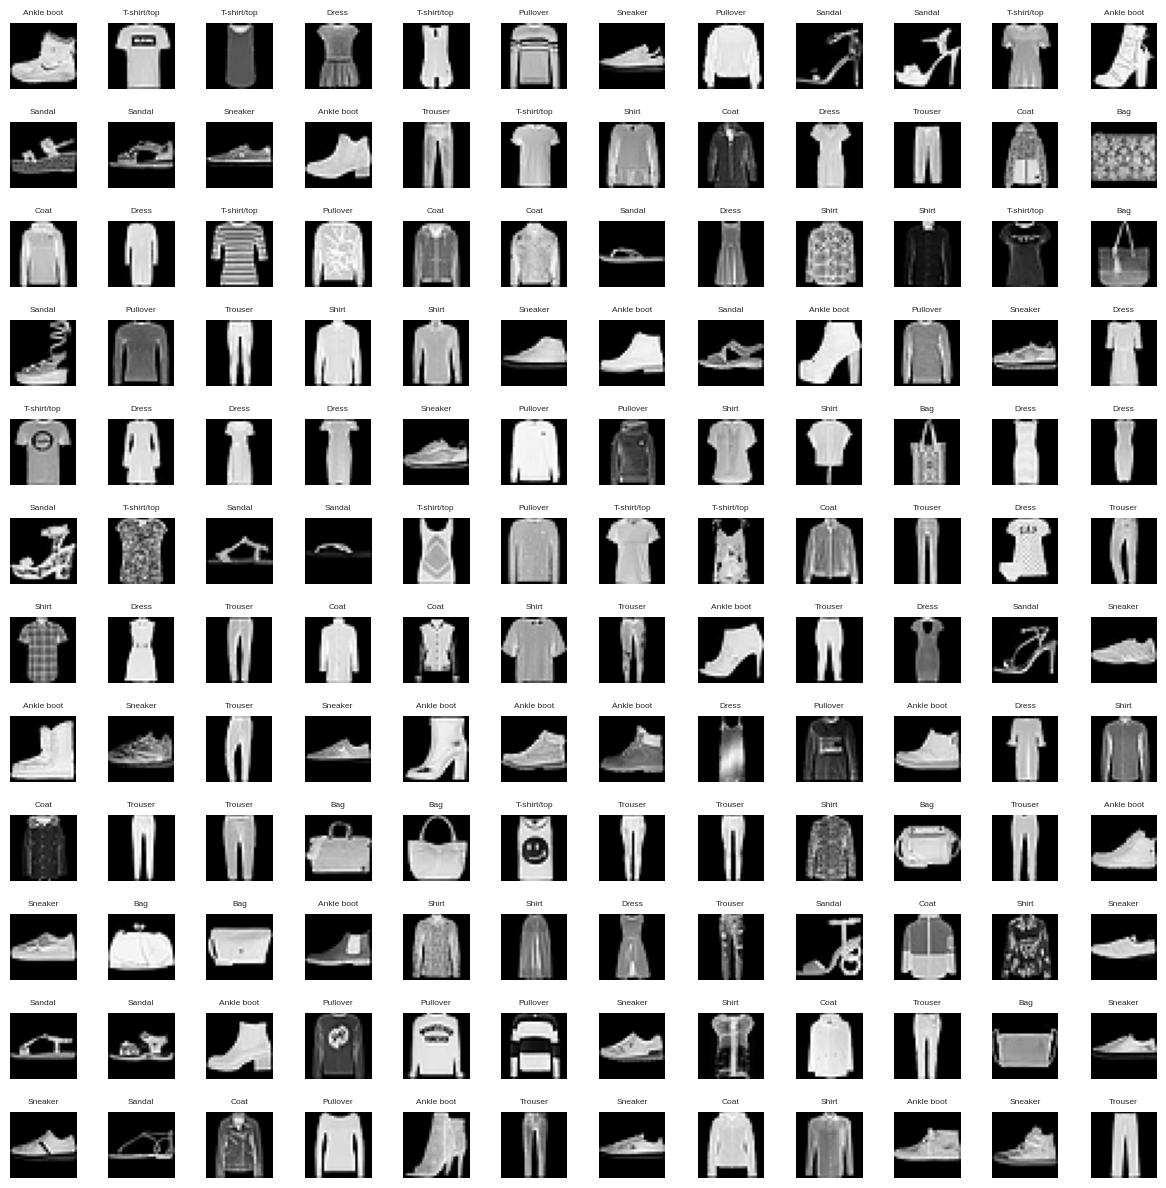

In [112]:
import numpy as np

W_grid = 12
L_grid = 12

fig, axes = plt.subplots(L_grid, W_grid, figsize=(15, 15))
axes = axes.ravel()

for i in range(W_grid * L_grid):
    label = np.argmax(train_labels[i])   # lấy index class
    axes[i].imshow(train_images[i], cmap="gray")
    axes[i].set_title(class_names[label], fontsize=6)
    axes[i].axis("off")

plt.subplots_adjust(hspace=0.5)
plt.show()


# TASK #4: PREPARE THE DATA FOR TRAINING

In [113]:
number_cat = 10
y_train = tf.keras.utils.to_categorical(y_train, number_cat)

In [114]:
X_train.shape

(60000, 28, 28)

In [115]:
y_train.shape

(60000, 10)

In [116]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [117]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [118]:
y_test = tf.keras.utils.to_categorical(y_test, number_cat)

In [119]:
X_train.shape

(60000, 28, 28)

In [120]:
X_train = np.expand_dims(X_train, axis=-1)

In [121]:
X_train.shape

(60000, 28, 28, 1)

In [122]:
y_train.shape

(60000, 10)

In [123]:

# Chuẩn hóa dữ liệu về [0,1]
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


X_train: (60000, 28, 28, 1, 1)
y_train: (60000, 10)
X_test: (10000, 28, 28, 1, 1)
y_test: (10000, 10)


# TASK #5: BUILD A DEEP LEARNING MODEL

![image.png](attachment:image.png)

In [124]:
from tensorflow.keras import datasets, layers, models
# Xây dựng mô hình CNN
cnn = models.Sequential()

# Convolutional layer 1 + MaxPooling
cnn.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
cnn.add(layers.MaxPooling2D((2,2)))

# Convolutional layer 2 + MaxPooling
cnn.add(layers.Conv2D(64, (3,3), activation='relu'))
cnn.add(layers.MaxPooling2D((2,2)))

# Convolutional layer 3
cnn.add(layers.Conv2D(64, (3,3), activation='relu'))

# Flatten trước khi vào Dense layer
cnn.add(layers.Flatten())

# Dense layers
cnn.add(layers.Dense(64, activation='relu'))
cnn.add(layers.Dense(10, activation='softmax'))  # output 10 class

# Tóm tắt mô hình
cnn.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

# TASK #6: COMPILE AND TRAIN A DEEP LEARNING MODEL

In [125]:
cnn.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001, decay = 1e-6), loss ='categorical_crossentropy', metrics =['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [126]:
X_train.shape

(60000, 28, 28, 1, 1)

In [127]:
# Train model
history = cnn.fit(X_train, y_train,
                  epochs=10,
                  batch_size=64,
                  validation_split=0.2,
                  verbose=1)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.1105 - loss: 2.3022 - val_accuracy: 0.1277 - val_loss: 2.2988
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.2499 - loss: 2.2543 - val_accuracy: 0.4619 - val_loss: 1.7340
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.5050 - loss: 1.5088 - val_accuracy: 0.6484 - val_loss: 1.0246
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 49s 64ms/step - accuracy: 0.6518 - loss: 0.9847 - val_accuracy: 0.6890 - val_loss: 0.8739
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 38s 51ms/step - accuracy: 0.6830 - loss: 0.8665 - val_accuracy: 0.7004 - val_loss: 0.8281
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.6945 - loss: 0.8314 - val_accuracy: 0.7085 - val_loss: 0.7943
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 51ms/step - accuracy: 0.7040 - loss: 0.7953 - val_accuracy: 0.7076 - val_loss: 0.7720
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.7164 - loss: 0.7710 - 

# Task 7: Perform hyperparameter tuning using Keras Tuner.
Example: Define a custom tuner class implementing Bayesian Optimization for tuning model parameters.


In [128]:

# Hàm xây dựng model với hyperparameters
def build_model(hp):
    model = keras.Sequential()

    # Conv layer đầu tiên
    model.add(keras.layers.Conv2D(
        filters=hp.Int("conv_1_filter", min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice("conv_1_kernel", values=[3,5]),
        activation="relu",
        input_shape=(28,28,1)
    ))
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Conv layer thứ hai
    model.add(keras.layers.Conv2D(
        filters=hp.Int("conv_2_filter", min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice("conv_2_kernel", values=[3,5]),
        activation="relu"
    ))
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

    # Flatten
    model.add(keras.layers.Flatten())

    # Dense layer ẩn
    model.add(keras.layers.Dense(
        units=hp.Int("dense_units", min_value=64, max_value=512, step=64),
        activation="relu"
    ))

    # Dropout (để tránh overfitting)
    model.add(keras.layers.Dropout(rate=hp.Float("dropout_rate", 0.2, 0.5, step=0.1)))

    # Output layer
    model.add(keras.layers.Dense(10, activation="softmax"))

    # Compile
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
        ),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model


In [129]:
# Tạo tuner (Bayesian Optimization)
tuner = kt.BayesianOptimization(
    build_model,
    objective="val_accuracy",
    max_trials=10,              # số lượng cấu hình thử nghiệm
    executions_per_trial=1,     # số lần chạy cho mỗi trial
    directory="fashion_tuning",
    project_name="cnn_fashion"
)

# Tiến hành search hyperparameters
tuner.search(X_train, y_train,
             epochs=5,
             validation_split=0.2,
             verbose=1)

# Lấy best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print("conv_1_filter:", best_hps.get("conv_1_filter"))
print("conv_1_kernel:", best_hps.get("conv_1_kernel"))
print("conv_2_filter:", best_hps.get("conv_2_filter"))
print("conv_2_kernel:", best_hps.get("conv_2_kernel"))
print("dense_units:", best_hps.get("dense_units"))
print("dropout_rate:", best_hps.get("dropout_rate"))
print("learning_rate:", best_hps.get("learning_rate"))

Trial 10 Complete [00h 06m 15s]
val_accuracy: 0.7310000061988831

Best val_accuracy So Far: 0.8150833249092102
Total elapsed time: 01h 55m 10s
Best Hyperparameters:
conv_1_filter: 96
conv_1_kernel: 5
conv_2_filter: 32
conv_2_kernel: 5
dense_units: 320
dropout_rate: 0.2
learning_rate: 0.001


# TASK #8: ASSESS TRAINED THE BEST MODEL PERFORMANCE

In [134]:
X_test.shape

(10000, 28, 28, 1, 1)

In [135]:
X_test = np.expand_dims(X_test, axis=-1)

In [136]:
X_test.shape

(10000, 28, 28, 1, 1, 1)

In [140]:
y_test.shape

(10000, 10)

In [141]:
# Đảm bảo dữ liệu test có đúng shape (28,28,1)
if len(X_test.shape) == 3:
    X_test = np.expand_dims(X_test, axis=-1)

print("X_test shape sau:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape sau: (10000, 28, 28, 1, 1, 1)
y_test shape: (10000, 10)


In [144]:
X_test = X_test.reshape(-1, 28, 28, 1)

In [145]:
X_test = X_test.astype('float')


In [146]:
predicted_classes = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [147]:
predicted_classes

array([[1.3990642e-06, 6.0787464e-12, 1.3817655e-06, ..., 2.7526054e-01,
        3.0410879e-03, 4.0545732e-01],
       [2.5271997e-02, 3.1909842e-08, 5.9595406e-01, ..., 1.7200690e-14,
        9.0198465e-02, 3.1442876e-12],
       [8.0564187e-04, 9.7762680e-01, 1.3127019e-04, ..., 6.7305792e-12,
        1.7869128e-08, 1.6988252e-12],
       ...,
       [2.4494737e-02, 1.9415759e-07, 2.3558740e-02, ..., 1.4123994e-04,
        8.3793551e-01, 4.9337704e-04],
       [3.6488320e-03, 8.2309461e-01, 6.7914851e-05, ..., 1.1874644e-08,
        1.5131396e-07, 3.4604346e-09],
       [9.6567594e-05, 8.5326036e-08, 3.3239668e-04, ..., 2.7799252e-01,
        2.1650681e-02, 1.4353712e-02]], dtype=float32)

In [148]:
predicted_classes=np.argmax(predicted_classes,axis=1)


In [149]:
predicted_classes

array([9, 2, 1, ..., 8, 1, 5])

In [150]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [151]:
y_test = y_test.argmax(1)

In [152]:
y_test

array([9, 2, 1, ..., 8, 1, 5])

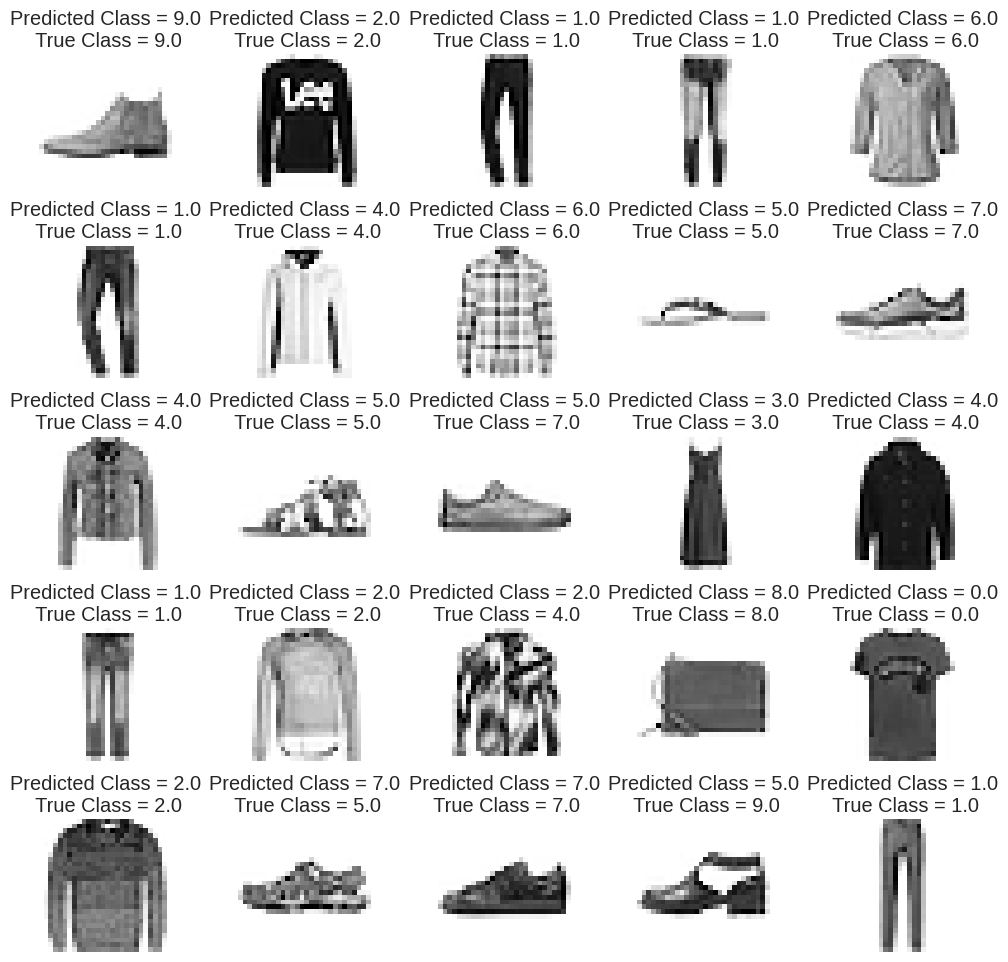

In [153]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() #

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Predicted Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [158]:
from sklearn.metrics import confusion_matrix
for i in np.arange(L*W):
    axes[i].imshow(X_test[i].reshape(28,28), cmap='gray')
    axes[i].set_title(f"Pred = {predicted_classes[i]}\nTrue = {y_test[i]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

<Figure size 800x700 with 0 Axes>

In [156]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ['class {}'.format(i) for i in range(num_classes)]



**PRACTICE OPPORTUNITY #3:**
- **Add a new dense layer containing 1024 neurons**
- **Increase the number of epochs**
- **Plot the model summary and determine the number of trainable parameters**
- **Retrain the model and evaluate its performance**

In [160]:
# Xây dựng CNN mới với Dense 1024 neurons
cnn_big = models.Sequential()

# Convolutional layers
cnn_big.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
cnn_big.add(layers.MaxPooling2D((2,2)))

cnn_big.add(layers.Conv2D(64, (3,3), activation='relu'))
cnn_big.add(layers.MaxPooling2D((2,2)))

cnn_big.add(layers.Conv2D(64, (3,3), activation='relu'))

# Flatten
cnn_big.add(layers.Flatten())

# Dense layers
cnn_big.add(layers.Dense(64, activation='relu'))
cnn_big.add(layers.Dense(1024, activation='relu'))  # thêm dense layer 1024 neurons
cnn_big.add(layers.Dense(10, activation='softmax'))

# Compile model
cnn_big.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Xem tóm tắt mô hình
cnn_big.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169,482 (662.04 KB)

 Trainable params: 169,482 (662.04 KB)

 Non-trainable params: 0 (0.00 B)

In [161]:
# Train model với nhiều epochs hơn
history_big = cnn_big.fit(X_train, y_train,
                          epochs=20,          # tăng số epochs
                          batch_size=64,
                          validation_split=0.2,
                          verbose=1)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 58ms/step - accuracy: 0.1070 - loss: 2.3024 - val_accuracy: 0.1091 - val_loss: 2.3012
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - accuracy: 0.1748 - loss: 2.2728 - val_accuracy: 0.3651 - val_loss: 1.7426
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.4857 - loss: 1.4533 - val_accuracy: 0.6361 - val_loss: 0.9888
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.6349 - loss: 0.9676 - val_accuracy: 0.6651 - val_loss: 0.8981
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.6593 - loss: 0.9020 - val_accuracy: 0.6867 - val_loss: 0.8287
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.6814 - loss: 0.8388 - val_accuracy: 0.7049 - val_loss: 0.7946
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.7024 - loss: 0.7836 - val_accuracy: 0.7247 - val_loss: 0.7376
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.7171 - loss: 0.7481 - 

# GREAT JOB!

# PRACTICE OPPORTUNITIES SOLUTIONS

**PRACTICE OPPORTUNITY #1 SOLUTION:**
- **Check out the sizes of both training and testing datasets**

In [170]:
X_train.shape

(60000, 28, 28, 1, 1)

In [171]:
X_test.shape

(10000, 28, 28, 1)

In [172]:
y_train.shape

(60000, 10)

In [173]:
y_test.shape

(10000,)

**PRACTICE OPPORTUNITY #2 SOLUTION:**
- **Plot a grid containing 144 images and perform a sanity check on the data**

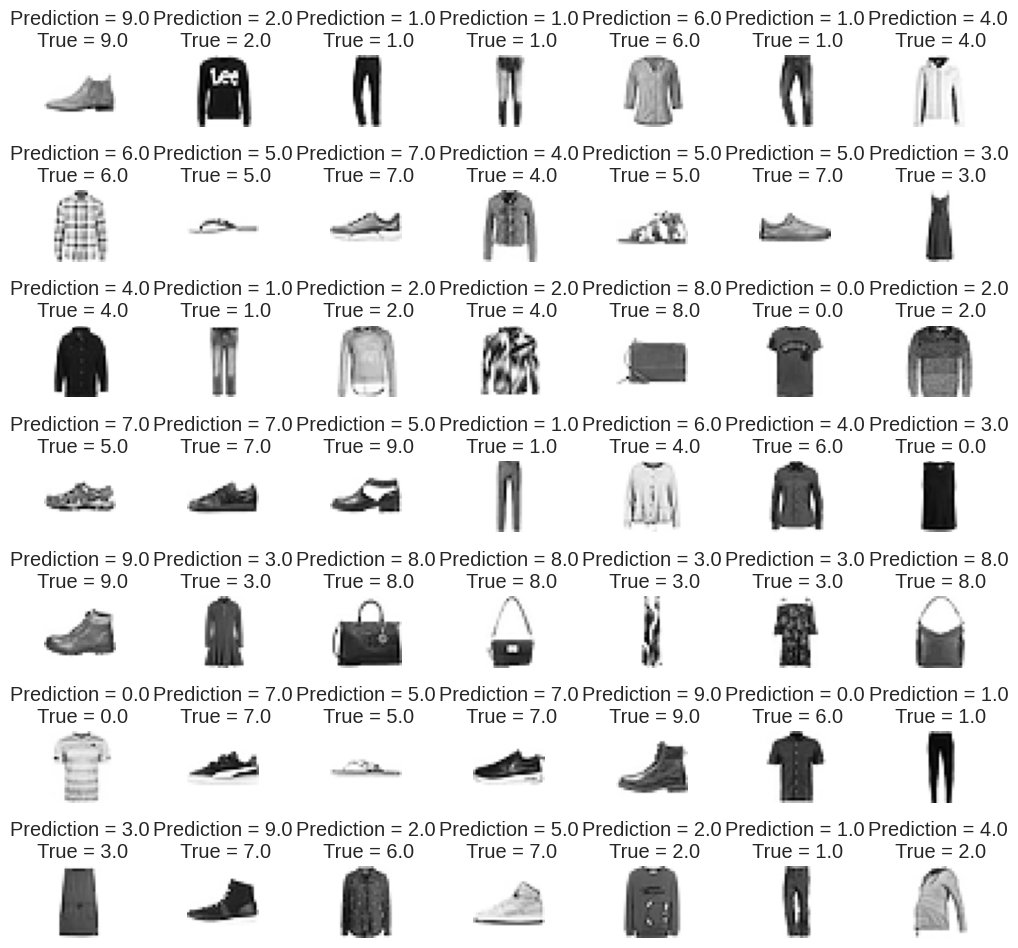

In [174]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction = {:0.1f}\n True = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

**PRACTICE OPPORTUNITY #3 SOLUTION:**
- **Add a new dense layer containing 1024 neurons**
- **Increase the number of epochs**
- **Plot the model summary and determine the number of trainable parameters**
- **Retrain the model and evaluate its performance**

In [175]:
from tensorflow.keras import datasets, layers, models
cnn = models.Sequential()

cnn.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)  ))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu' ))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu' ))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(64, activation = 'relu'))
cnn.add(layers.Dense(1000, activation = 'relu'))
cnn.add(layers.Dense(10, activation = 'softmax'))
cnn.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1000)           │        65,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,682 (655.01 KB)

 Trainable params: 167,682 (655.01 KB)

 Non-trainable params: 0 (0.00 B)

In [176]:
# Compile model
cnn_big.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [177]:
# Train model với nhiều epochs hơn
history_big = cnn_big.fit(X_train, y_train,
                          epochs=20,          # tăng số epochs
                          batch_size=64,
                          validation_split=0.2,
                          verbose=1)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.7889 - loss: 0.5565 - val_accuracy: 0.7797 - val_loss: 0.5899
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.7960 - loss: 0.5457 - val_accuracy: 0.7882 - val_loss: 0.5558
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.7958 - loss: 0.5409 - val_accuracy: 0.7990 - val_loss: 0.5380
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.7998 - loss: 0.5341 - val_accuracy: 0.7968 - val_loss: 0.5329
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.8025 - loss: 0.5140 - val_accuracy: 0.8072 - val_loss: 0.5133
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.8083 - loss: 0.5129 - val_accuracy: 0.8070 - val_loss: 0.5134
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.8084 - loss: 0.5091 - val_accuracy: 0.8094 - val_loss: 0.5048
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.8127 - loss: 0.5033 - 